In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv(r"C:\Users\waghb\OneDrive\Desktop\dsbdal\DSBDALExam DataSets\Adult\adult_dataset.csv")
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
df.columns = ["Age", "Employment_Type", "fnwlgt", "Education", "Experience","Martial-Status", "Occupation", "Relation", "Race", "Sex", "Capital_Gain", "Capital_Loss", "Hours_Per_Week", "Country", "Target"]
df

,Age,Employment_Type,fnwlgt,Education,Experience,Martial-Status,Occupation,Relation,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Country,Target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
df.isnull().sum()

Age                0
Employment_Type    0
fnwlgt             0
Education          0
Experience         0
Martial-Status     0
Occupation         0
Relation           0
Race               0
Sex                0
Capital_Gain       0
Capital_Loss       0
Hours_Per_Week     0
Country            0
Target             0
dtype: int64

In [8]:
(df.values == np.nan).sum()

np.int64(0)

In [9]:
(df.values == ' ?').sum()

np.int64(0)

In [10]:
df["Employment_Type"].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [11]:
df.replace(' ?', np.nan, inplace=True)

In [12]:
df = df.dropna()

In [13]:
df

,Age,Employment_Type,fnwlgt,Education,Experience,Martial-Status,Occupation,Relation,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Country,Target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [14]:
df["Employment_Type"].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [15]:
df.loc[df["Employment_Type"]==1,"Employment_Type"]==" Self-emp-not-inc"
df.loc[df["Employment_Type"]==2, "Employment_Type"]==" Private"

Series([], Name: Employment_Type, dtype: bool)

In [16]:
df.head()

,Age,Employment_Type,fnwlgt,Education,Experience,Martial-Status,Occupation,Relation,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Country,Target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [34]:
df["Employment_Type"] = sns.fit_transform(df["Employment_Type"])

AttributeError: module 'seaborn' has no attribute 'fit_transform'

In [ ]:
df["Education"] = lb.fit_transform(df["Education"])

In [18]:
df["Martial-Status"] = lb.fit_transform(df["Martial-Status"])

NameError: name 'lb' is not defined

In [19]:
df["Occupation"] = lb.fit_transform(df["Occupation"])

NameError: name 'lb' is not defined

In [20]:
df["Relation"] = lb.fit_transform(df["Relation"])

NameError: name 'lb' is not defined

In [21]:
df["Race"] = lb.fit_transform(df["Race"])

NameError: name 'lb' is not defined

In [22]:
df["Country"] = lb.fit_transform(df["Country"])

NameError: name 'lb' is not defined

In [23]:
df["Sex"] = lb.fit_transform(df["Sex"])

NameError: name 'lb' is not defined

In [24]:
df["Target"] = lb.fit_transform(df["Target"])

NameError: name 'lb' is not defined

In [25]:
df

,Age,Employment_Type,fnwlgt,Education,Experience,Martial-Status,Occupation,Relation,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Country,Target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [26]:
df["Employment_Type"].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [27]:
df["Race"].unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [28]:
df["Country"].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [29]:
df["Target"].unique()

array(['<=50K', '>50K'], dtype=object)

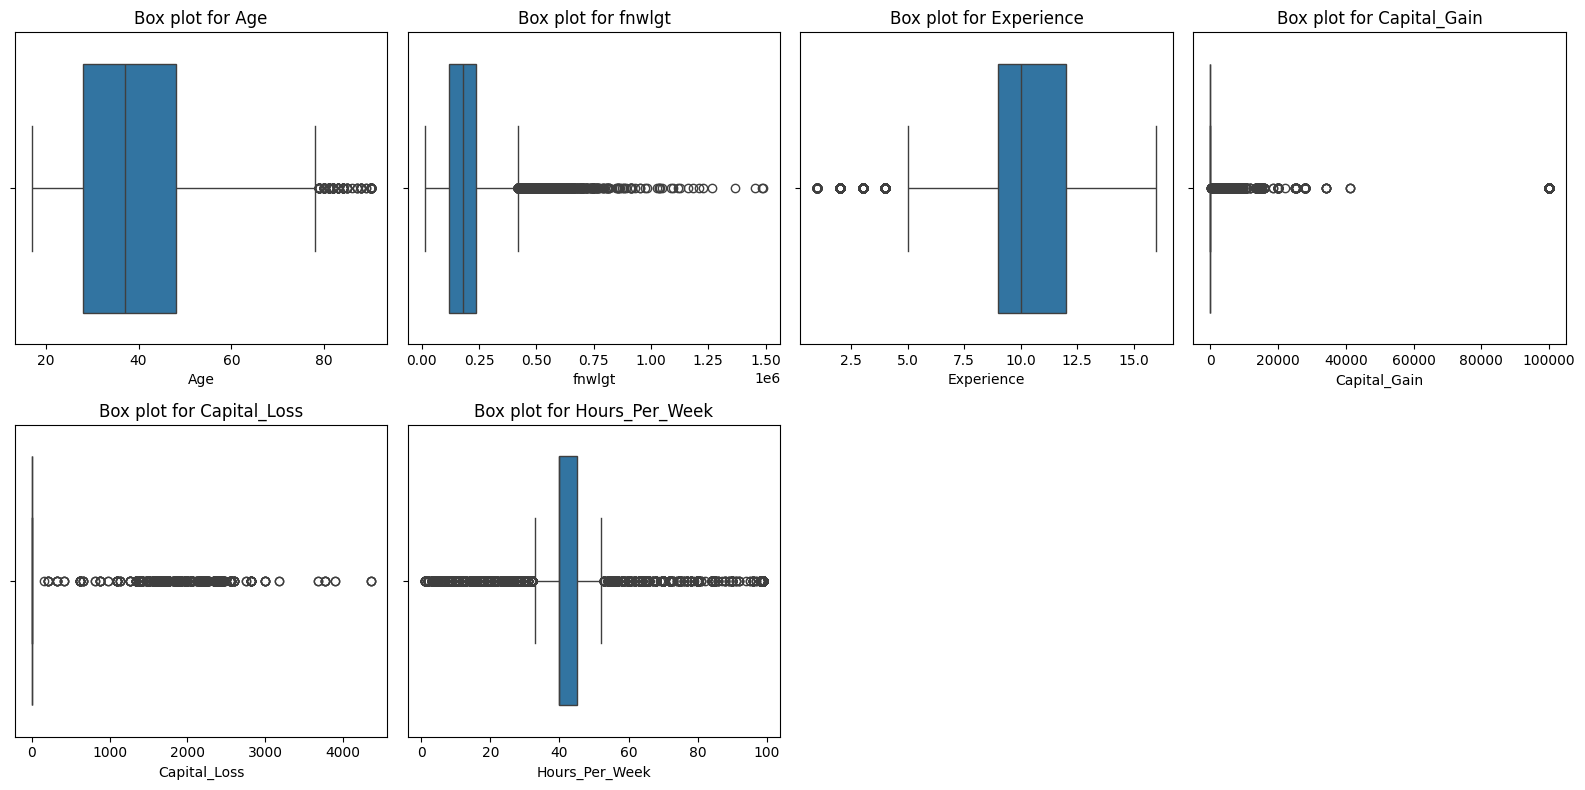

In [30]:
def box_plot(df):
    num_cols = len(df.select_dtypes(include=["int64", "float64", "int32"]).columns)
    num_rows = (num_cols + 3) // 4
    num_cols = min(num_cols, 4)
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4 * num_rows))
    
    axes = axes.flatten()
    
    for i, col in enumerate(df.select_dtypes(include=["int64", "float64", "int32"]).columns):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(f"Box plot for {col}")
        
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
        
    plt.tight_layout()
    plt.show()

box_plot(df)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              48842 non-null  int64 
 1   Employment_Type  48842 non-null  object
 2   fnwlgt           48842 non-null  int64 
 3   Education        48842 non-null  object
 4   Experience       48842 non-null  int64 
 5   Martial-Status   48842 non-null  object
 6   Occupation       48842 non-null  object
 7   Relation         48842 non-null  object
 8   Race             48842 non-null  object
 9   Sex              48842 non-null  object
 10  Capital_Gain     48842 non-null  int64 
 11  Capital_Loss     48842 non-null  int64 
 12  Hours_Per_Week   48842 non-null  int64 
 13  Country          48842 non-null  object
 14  Target           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [32]:
threshold = {
    "Age" : 50, "Employment_Type" : 7, "fnwlgt": 250000, "Education": 12, "Experience" : 13,"Martial-Status":4, "Occupation":9, "Relation":3, "Race":4, "Sex":1, "Capital_Gain":10000, "Capital_Loss":30000, "Hours_Per_Week":50, "Country":38,"Target":1
}

Removing Outlier for Age


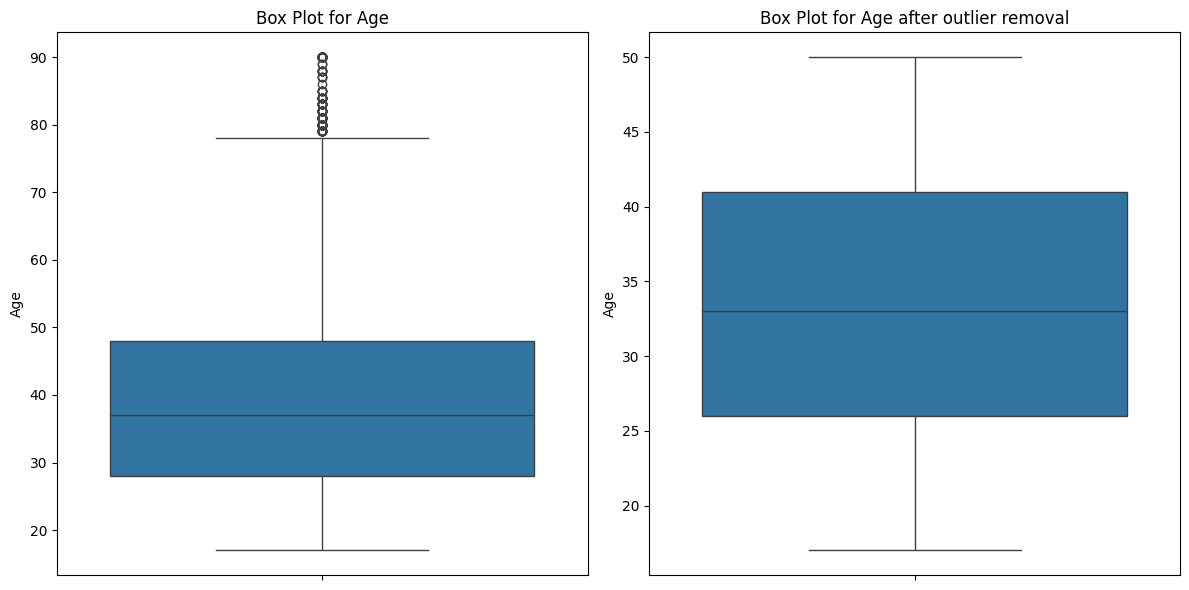

Removing Outlier for Employment_Type


TypeError: '<=' not supported between instances of 'str' and 'int'

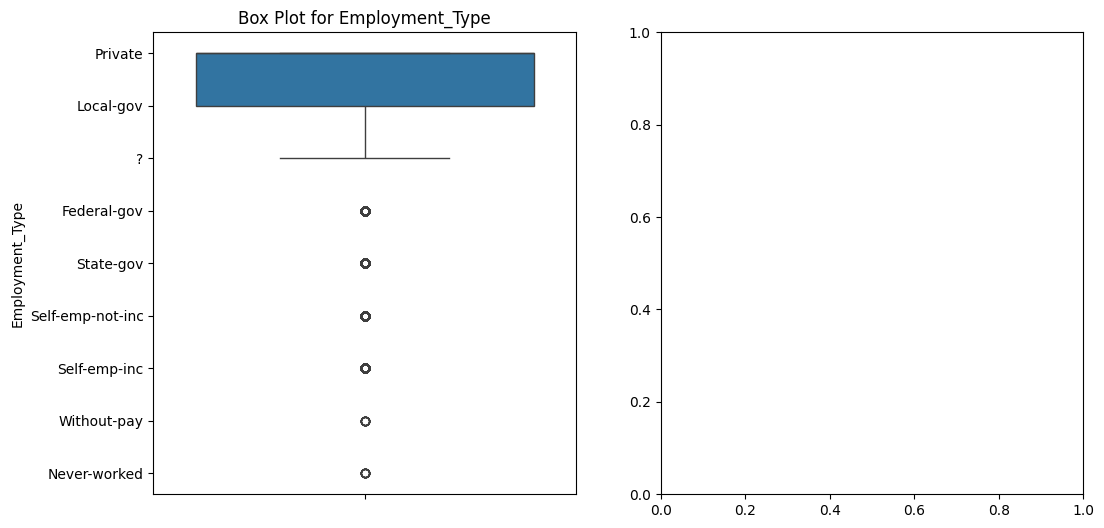

In [33]:
def remove_box(col, thres, df):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    sns.boxplot(df[col], ax=axes[0])
    axes[0].set_title(f"Box Plot for {col}")

    remove_out = df[df[col] <= thres]
    
    sns.boxplot(remove_out[col], ax=axes[1])
    axes[1].set_title(f"Box Plot for {col} after outlier removal")

    plt.tight_layout()
    plt.show()

    return remove_out

def remove_outlier(df, threshold):
    for col, thres in threshold.items():
        print(f"Removing Outlier for {col}")
        df = remove_box(col, thres, df)
    
    return df

new_df = remove_outlier(df, threshold)


In [ ]:
attributes = df[["Age", "Employment_Type", "fnwlgt", "Education", "Experience","Martial-Status", "Occupation", "Relation", "Race", "Sex", "Capital_Gain", "Capital_Loss", "Hours_Per_Week", "Country"]]

In [ ]:
from sklearn.model_selection import train_test_split


In [126]:
x_train,x_test,y_train,y_test = train_test_split(attributes,df["Target"],test_size=0.25,random_state=0)

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [128]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
lr_acc = accuracy_score(lr_pred,y_test)
lr_acc

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7838482959819653

In [129]:
from sklearn.naive_bayes import GaussianNB

In [131]:
gb = GaussianNB()
gb.fit(x_train,y_train)
gb_pred = gb.predict(x_test)
gb_acc = accuracy_score(y_test,gb_pred)
gb_acc

0.7866330725367988